In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing various python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure

In [ ]:
#loading the datasets into dataframes
features = pd.read_csv('/content/drive/MyDrive/Datasets/Store-Sales-Features/Features data set.csv')
store = pd.read_csv('/content/drive/MyDrive/Datasets/Store-Sales-Features/stores data-set.csv')
sales = pd.read_csv('/content/drive/MyDrive/Datasets/Store-Sales-Features/sales data-set.csv')

In [ ]:
features.head() #the first 5 records in Features Dataset

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
store.head()#the first 5 records in Stores Dataset

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
sales.head()#the first 5 records in Sales Dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [ ]:
#printing types of variables and number of unique values
for df,name in zip([features,store,sales],['Features','Store','Sales']):
  print(f'{name}-:')
  print("Number of records: "+str(df.shape[0]))
  print("Number of variables:",df.shape[1])
  for column in df.columns:
    Unique_list=pd.unique(df[column])
    print(f"{column} is of type- "+str(df[column].dtypes)+f". It has {len(Unique_list)} unique values and {np.sum(pd.isnull(df[column]))} missing values")
  print('\n\n')

Features-:
Number of records: 8190
Number of variables: 12
Store is of type- int64. It has 45 unique values and 0 missing values
Date is of type- object. It has 182 unique values and 0 missing values
Temperature is of type- float64. It has 4178 unique values and 0 missing values
Fuel_Price is of type- float64. It has 1011 unique values and 0 missing values
MarkDown1 is of type- float64. It has 4024 unique values and 4158 missing values
MarkDown2 is of type- float64. It has 2716 unique values and 5269 missing values
MarkDown3 is of type- float64. It has 2886 unique values and 4577 missing values
MarkDown4 is of type- float64. It has 3406 unique values and 4726 missing values
MarkDown5 is of type- float64. It has 4046 unique values and 4140 missing values
CPI is of type- float64. It has 2506 unique values and 585 missing values
Unemployment is of type- float64. It has 405 unique values and 585 missing values
IsHoliday is of type- bool. It has 2 unique values and 0 missing values



Store

In [ ]:
#obtaining the unique values of each variable in the datasets
for df,name in zip([features,store,sales],['Features','Store','Sales']):
  print(f'{name}-:')
  for column in df.columns:
    print(f"{column}'s unique elements:\n{df[column].unique()}")
  print('\n\n')

Features-:
Store's unique elements:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Date's unique elements:
['05/02/2010' '12/02/2010' '19/02/2010' '26/02/2010' '05/03/2010'
 '12/03/2010' '19/03/2010' '26/03/2010' '02/04/2010' '09/04/2010'
 '16/04/2010' '23/04/2010' '30/04/2010' '07/05/2010' '14/05/2010'
 '21/05/2010' '28/05/2010' '04/06/2010' '11/06/2010' '18/06/2010'
 '25/06/2010' '02/07/2010' '09/07/2010' '16/07/2010' '23/07/2010'
 '30/07/2010' '06/08/2010' '13/08/2010' '20/08/2010' '27/08/2010'
 '03/09/2010' '10/09/2010' '17/09/2010' '24/09/2010' '01/10/2010'
 '08/10/2010' '15/10/2010' '22/10/2010' '29/10/2010' '05/11/2010'
 '12/11/2010' '19/11/2010' '26/11/2010' '03/12/2010' '10/12/2010'
 '17/12/2010' '24/12/2010' '31/12/2010' '07/01/2011' '14/01/2011'
 '21/01/2011' '28/01/2011' '04/02/2011' '11/02/2011' '18/02/2011'
 '25/02/2011' '04/03/2011' '11/03/2011' '18/03/2011' '25/03/2011'
 '01/04/20

#Data Preprocessing

In [ ]:
#dropping columns which have a large no. of NA entries
features=features.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'] )

In [ ]:
#dropping records that contain the following dates since weekly sales for these weeks have not been given in the sales dataset
dates=['/2013','02/11/2012','09/11/2012','16/11/2012','23/11/2012','30/11/2012','07/12/2012','14/12/2012''21/12/2012','28/12/2012']
for date in dates:
  features=features[~features.Date.str.contains(date)]
print(len(features['Date'].unique()))
display(features)

145


,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,211.350143,8.106,False
...,...,...,...,...,...,...,...
8148,45,12/10/2012,54.47,4.000,192.327265,8.667,False
8149,45,19/10/2012,56.47,3.969,192.330854,8.667,False
8150,45,26/10/2012,58.85,3.882,192.308899,8.667,False
8157,45,14/12/2012,43.55,3.637,192.358548,8.667,False


## Exploratory Data Analysis 

In [ ]:
#creating lists of discrete and continuous variables respectively
discretevariables=['IsHoliday','Store']
continuousvariables=['Temperature','Fuel_Price','CPI','Unemployment'] 

In [ ]:
#displaying various statistical measurements of continuous variables
df=features.drop(columns=discretevariables)
df.describe()

,Temperature,Fuel_Price,CPI,Unemployment
count,6525.000000,6525.000000,6525.000000,6525.000000
mean,60.424716,3.358910,171.651100,7.984731
std,18.470794,0.456737,39.390133,1.876198
min,-2.060000,2.472000,126.064000,3.879000
25%,47.100000,2.938000,131.735000,6.891000
50%,62.310000,3.443000,182.622509,7.872000
75%,74.740000,3.734000,212.861131,8.622000
max,100.140000,4.468000,227.639444,14.313000


In [ ]:
#finding out the skew value of the continuous variables
df.skew()

Temperature    -0.316985
Fuel_Price     -0.096820
CPI             0.063914
Unemployment    1.177177
dtype: float64

We can infer that temperature and fuel_price are negatively skewed whereas CPI and Unemployment are positively skewed.

Temperature : 
The box and whiskers plot for Temperature is:


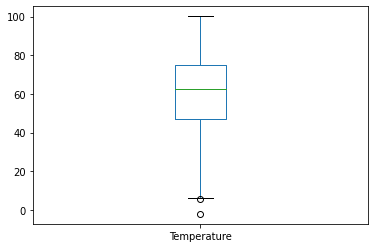


The histogram for continuous variable Temperature is: 


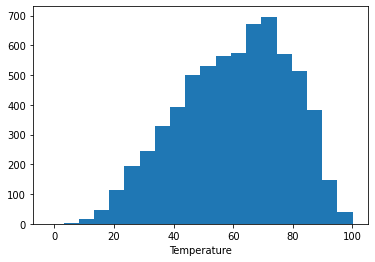


Fuel_Price : 
The box and whiskers plot for Fuel_Price is:


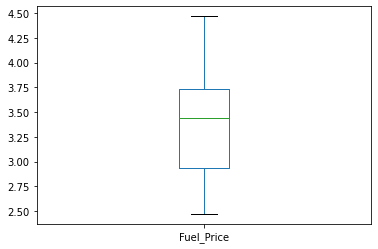


The histogram for continuous variable Fuel_Price is: 


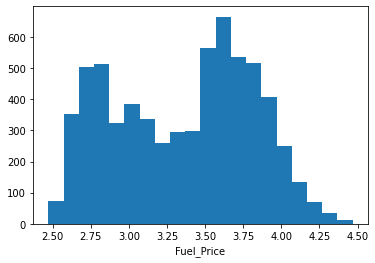


CPI : 
The box and whiskers plot for CPI is:


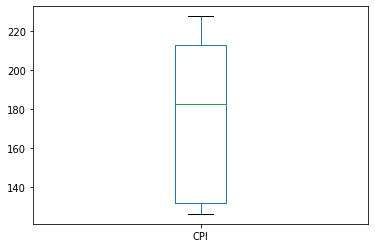


The histogram for continuous variable CPI is: 


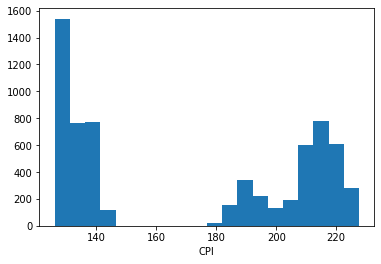


Unemployment : 
The box and whiskers plot for Unemployment is:


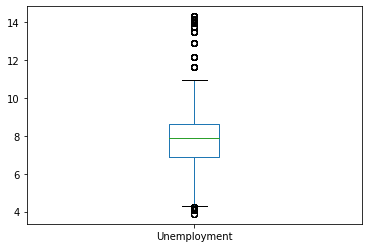


The histogram for continuous variable Unemployment is: 


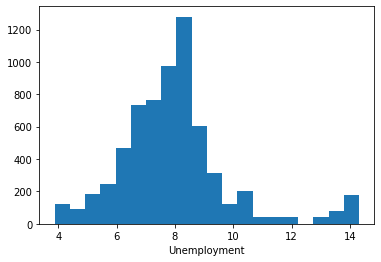

In [ ]:
# Plotting the box and whiskers plot and histogram for all continuous variables
for variable in continuousvariables:
 print(variable+' : ')
 print('The box and whiskers plot for '+variable+' is:')
 features[variable].plot.box();
 plt.show()
 print()
 print('The histogram for continuous variable '+ variable+ ' is: ')
 plt.hist(features[variable], bins=20) #right no of bins
 plt.xlabel(variable)
 plt.show()
 print()

The box and whiskers plots for Temperature and Unemployment have a few outliers visible. The histogram plots of these two variables look quite like that of a Gaussian or normal distribution, but with some slight skew.

The qq plot for Temperature is: 


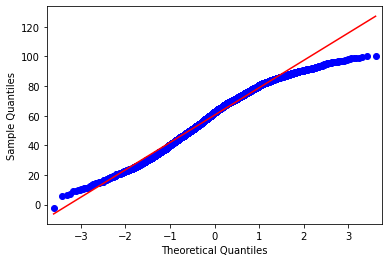


The qq plot for Fuel_Price is: 


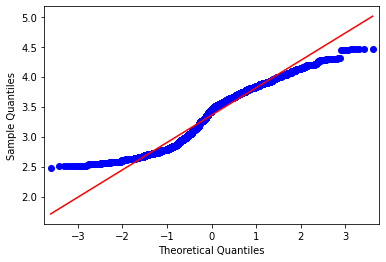


The qq plot for CPI is: 


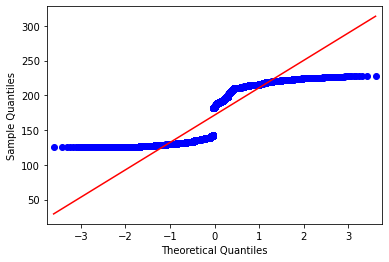


The qq plot for Unemployment is: 


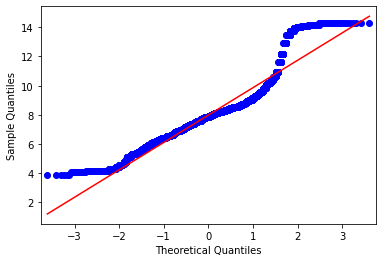

In [ ]:
#Plotting the QQ Plots of the continuous variables
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
for variable in continuousvariables:
 print('The qq plot for '+ variable + ' is: ')
 fig = sm.qqplot(features[variable],line='s')
 plt.show();
 print()

The results of the skew values are shown in visual form in the QQ plots above.

In [ ]:
#Calculating the weekly sales of each store from the sales datasets which contains sales for each department of a store, using groupby
df2=sales.groupby(['Store','Date'])['Weekly_Sales'].sum()
df2 = df2.reset_index()
df2.columns = ['Store', 'Date', 'Total_Weekly_Sales']
df2

,Store,Date,Total_Weekly_Sales
0,1,01/04/2011,1495064.75
1,1,01/06/2012,1624477.58
2,1,01/07/2011,1488538.09
3,1,01/10/2010,1453329.50
4,1,02/03/2012,1688420.76
...,...,...,...
6430,45,30/07/2010,716859.27
6431,45,30/09/2011,698986.34
6432,45,30/12/2011,869403.63
6433,45,31/08/2012,734297.87


In [ ]:
#Merging the weekly sales into the features dataset, to create a comprehensive dataset containing both the features and label
total=df2.merge(features, how='outer', on=['Store','Date'])
total=total.dropna()
#Merging the size of the store into the total dataset, to create a final dataset on which we will analyse
total=store.merge(total, how='outer', on='Store')
display(total)

,Store,Type,Size,Date,Total_Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,A,151315,01/04/2011,1495064.75,59.17,3.524,214.837166,7.682,False
1,1,A,151315,01/06/2012,1624477.58,77.95,3.501,221.747214,7.143,False
2,1,A,151315,01/07/2011,1488538.09,85.55,3.524,215.184137,7.962,False
3,1,A,151315,01/10/2010,1453329.50,71.89,2.603,211.671989,7.838,False
4,1,A,151315,02/03/2012,1688420.76,60.96,3.630,220.848045,7.348,False
...,...,...,...,...,...,...,...,...,...,...
6430,45,B,118221,30/07/2010,716859.27,79.78,2.781,182.441538,8.743,False
6431,45,B,118221,30/09/2011,698986.34,70.66,3.645,187.256664,8.625,False
6432,45,B,118221,30/12/2011,869403.63,37.79,3.389,189.062016,8.523,True
6433,45,B,118221,31/08/2012,734297.87,75.09,3.867,191.461281,8.684,False


In [ ]:
#Using Previous week sales as a feature
total['Prev_week_sales']=total['Total_Weekly_Sales'].shift(1)
total.dropna(axis=0,inplace=True)

In [ ]:
#Changing Date format and extracting month and week as features
total.Date=pd.to_datetime(total.Date)

In [ ]:
#finding the month and week of month from the Date variable
import calendar
import datetime
def week_of_month(tgtdate):

    days_this_month = calendar.mdays[tgtdate.month]
    for i in range(1, days_this_month):
        d = datetime.date(tgtdate.year, tgtdate.month, i)
        if d.day - d.weekday() > 0:
            startdate = d
            break
    # now we can use the modulo 7 appraoch
    return (tgtdate - startdate).days //7 + 1

In [ ]:
week=[]
for date in total['Date']:
  week.append(int(week_of_month(date.date())))

In [ ]:
total['month']=total.Date.apply(lambda x:x.month)
total['week']=week

In [ ]:
total # our final dataset on which we will perform the analysis and carry out prediction

,Store,Type,Size,Date,Total_Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Prev_week_sales,month,week
1,1,A,151315,2012-01-06,1624477.58,77.95,3.501,221.747214,7.143,False,1495064.75,1,1
2,1,A,151315,2011-01-07,1488538.09,85.55,3.524,215.184137,7.962,False,1624477.58,1,1
3,1,A,151315,2010-01-10,1453329.50,71.89,2.603,211.671989,7.838,False,1488538.09,1,1
4,1,A,151315,2012-02-03,1688420.76,60.96,3.630,220.848045,7.348,False,1453329.50,2,0
5,1,A,151315,2010-02-04,1594968.28,62.27,2.719,210.820450,7.808,False,1688420.76,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,B,118221,2010-07-30,716859.27,79.78,2.781,182.441538,8.743,False,737265.57,7,4
6431,45,B,118221,2011-09-30,698986.34,70.66,3.645,187.256664,8.625,False,716859.27,9,4
6432,45,B,118221,2011-12-30,869403.63,37.79,3.389,189.062016,8.523,True,698986.34,12,4
6433,45,B,118221,2012-08-31,734297.87,75.09,3.867,191.461281,8.684,False,869403.63,8,4


##Visualising correlations between the various features and weekly sales

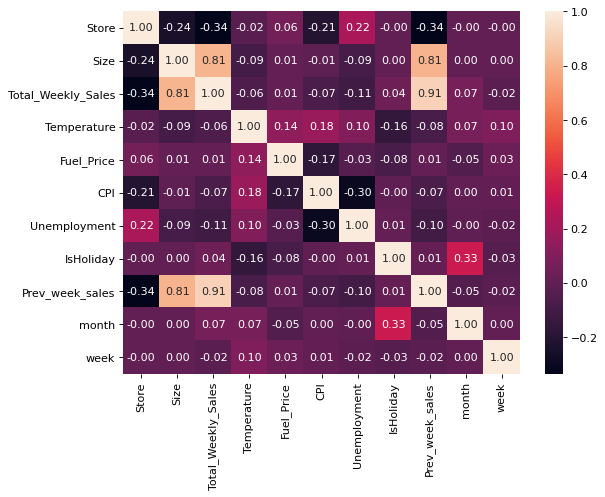

In [ ]:
#Plotting a heatmap to see the correlation between the various continuous variables
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(total.corr(), annot=True, fmt=".2f")
plt.show()

Total weekly sales is comparatively more correlated to size, previous week sales and store than the features.

In [ ]:
#creating a subset of the dataset to give clear scatter plots which are not that dense
df4=total.nlargest(100, ['Total_Weekly_Sales'])
df4 #dataset of the top 100 highest weekly sales

,Store,Type,Size,Date,Total_Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Prev_week_sales,month,week
1971,14,A,200898,2010-12-24,3818686.45,30.59,3.141,182.544590,8.724,False,1879891.13,12,3
2829,20,A,203742,2010-12-24,3766687.43,25.17,3.141,204.637673,7.484,False,1789687.65,12,3
1399,10,B,126512,2010-12-24,3749057.69,57.06,3.236,126.983581,9.003,False,1655036.75,12,3
536,4,A,205863,2011-12-23,3676388.98,35.92,3.103,129.984548,5.143,False,2031406.41,12,3
1828,13,A,219622,2010-12-24,3595903.20,34.90,2.846,126.983581,7.795,False,1705655.09,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,20,A,203742,2011-02-18,2258616.24,42.95,3.245,206.369470,7.343,False,2819193.17,2,2
1872,14,A,200898,2010-03-12,2258489.63,40.93,3.046,182.667615,8.724,False,2182563.66,3,2
1958,14,A,200898,2011-04-22,2256461.39,53.04,3.892,185.668467,8.521,False,2009004.59,4,3
1300,10,B,126512,2010-03-12,2251206.64,51.17,3.041,126.731333,9.003,False,1766331.45,3,2


We notice the top 10 weekly sales are occuring during the Christmas Week!

Bar graph between total weekly sales and whether the week is a holiday



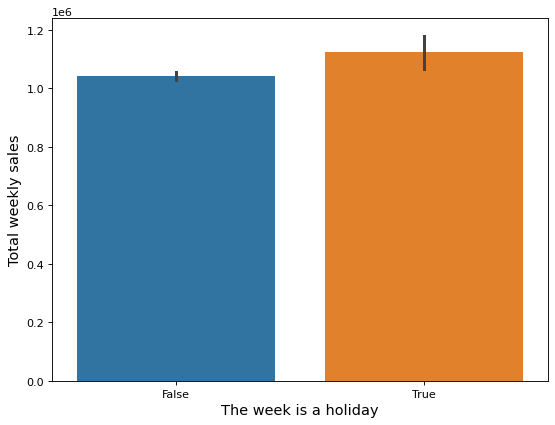

In [ ]:
#Plotting a bargraph to see how the week being a holiday afects the sales of a store
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.barplot(x="IsHoliday", y="Total_Weekly_Sales", data=total)
print('Bar graph between total weekly sales and whether the week is a holiday')
print()
plt.ylabel('Total weekly sales', fontsize=13)
plt.xlabel('The week is a holiday', fontsize=13)
plt.show();

As intuitively expected, sales are higher if the week contains a holiday rather than a normal week of the year since customers tend to splurge during the holidays.

Scatter plot between the total weekly sales and temperature


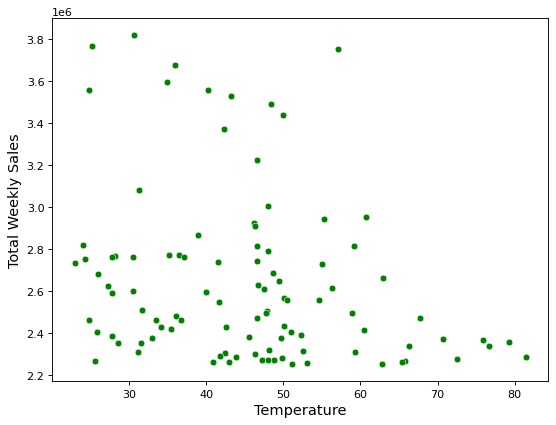

In [ ]:
#plotting a scatter plot to see the relation between temperature and weekly sales for the top 100 highest weekly sales
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.scatterplot(data=df4, x="Temperature", y="Total_Weekly_Sales",color='green')
plt.xlabel('Temperature', fontsize=13)
plt.ylabel('Total Weekly Sales', fontsize=13)
print('Scatter plot between the total weekly sales and temperature')
plt.show();

From the above scatter plot, we infer that at lower temperatures, the weekly sales are more abundant as well as higher as compared to when the temperatures increase and the general thought that customers do not tend to shop in adverse weather conditions, and if so then cooler weather is more probable, is depicted.

Bar graph between total weekly sales and the type of store



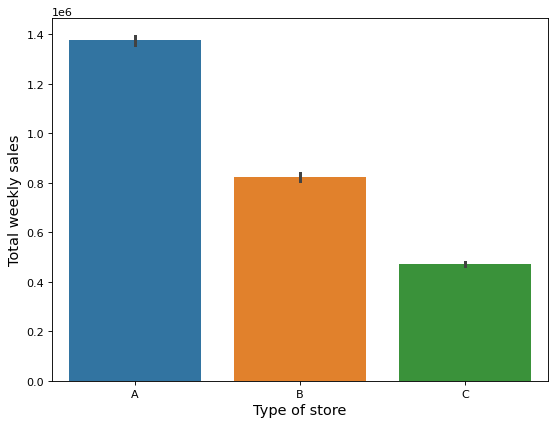

In [ ]:
#Plotting a bargraph to see how the type of store affects the sales of a store
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.barplot(x="Type", y="Total_Weekly_Sales", data=total)
print('Bar graph between total weekly sales and the type of store')
print()
plt.ylabel('Total weekly sales', fontsize=13)
plt.xlabel('Type of store', fontsize=13)
plt.show();

Type A stores contribute more to the weekly sales of the franchise as compared to B and C types.

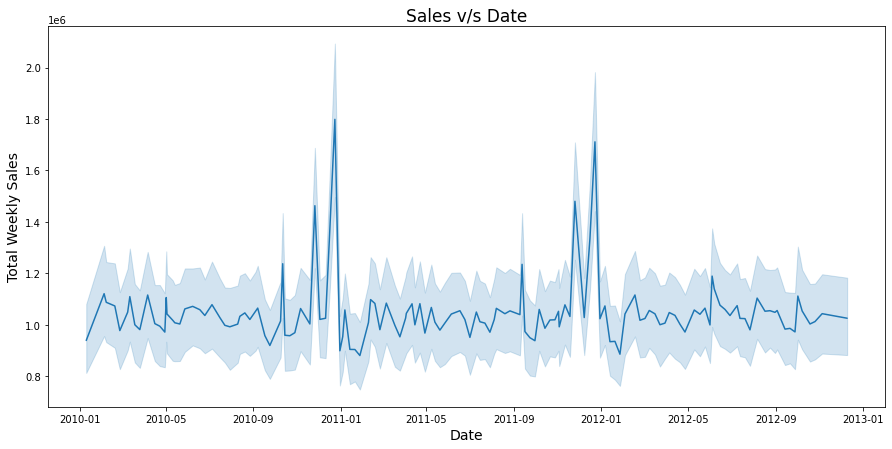

In [ ]:
#Plotting a line chart of total weekly sales against the date
fig,ax=plt.subplots(figsize=(15,7))
sns.set_style('darkgrid')
plt.title('Sales v/s Date', fontsize=17)
plt.xlabel('Date',size=14)
plt.ylabel('Total Weekly Sales',size=14)
x=total['Date']
y=total['Total_Weekly_Sales']
sns.lineplot(x=x,y=y)
plt.show()

The line plot shows slight fluctuations around the year, but sharp rises occur during festivals like Christmas, Thanksgiving, etc. when customers tend to buy more.

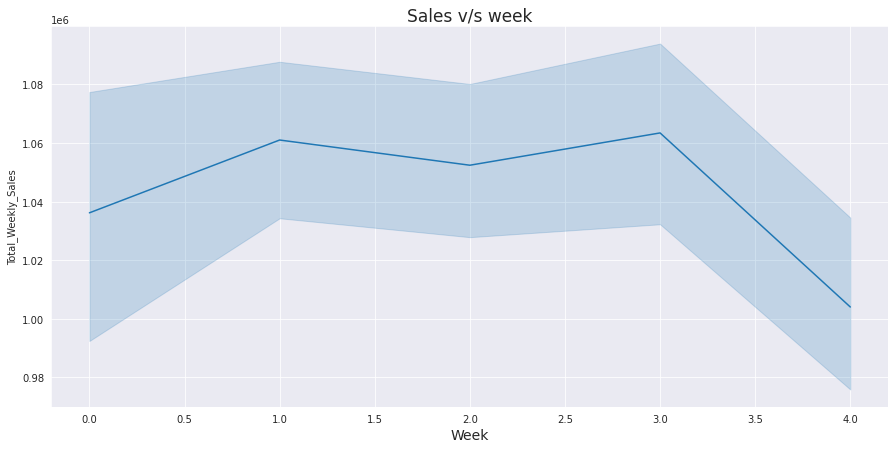

In [ ]:
#Plotting a line chart of total weekly sales against the week
fig,ax=plt.subplots(figsize=(15,7))
sns.set_style('darkgrid')
plt.title('Sales v/s week', fontsize=17)
plt.xlabel('Week',size=14)
x=total['week']
y=total['Total_Weekly_Sales']
sns.lineplot(x=x,y=y)
plt.show()

A general trend seen is sales increasing and reaching peaks during the middle weeks of a month and decreasing at the beginning and end of a month.

In [ ]:
total['week']=total['week'].astype(str)
total['month']=total['month'].astype(str)
total['month_week']=total[['month','week']].agg('-'.join,axis=1)

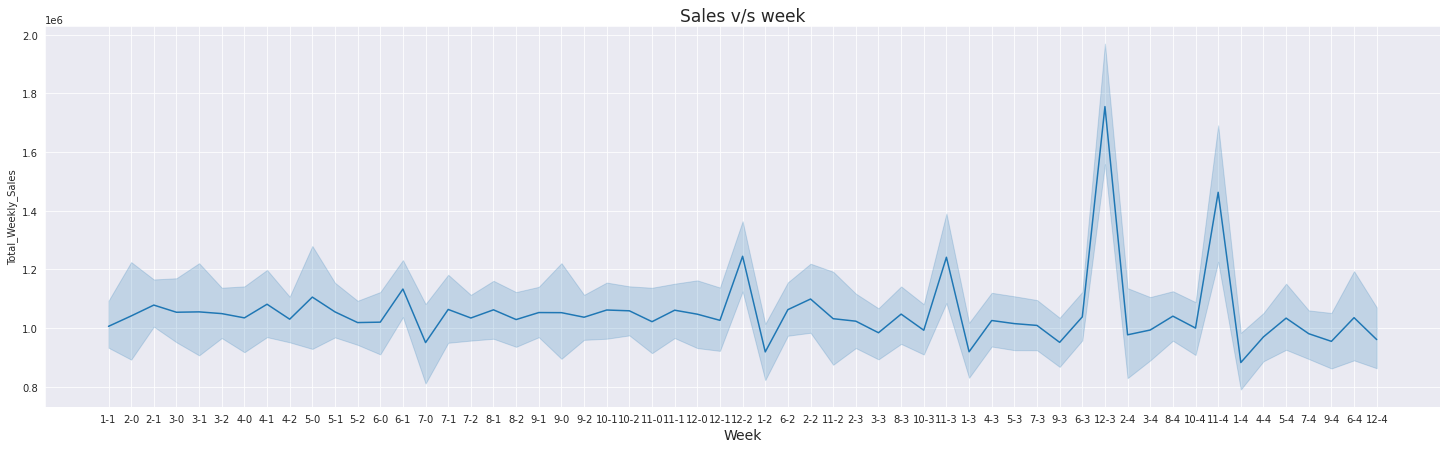

In [ ]:
#Plotting a line chart of total weekly sales against the month-week of month pair
fig,ax=plt.subplots(figsize=(25,7))
sns.set_style('darkgrid')
plt.title('Sales v/s week', fontsize=17)
plt.xlabel('Week',size=14)
x=total['month_week']
y=total['Total_Weekly_Sales']
sns.lineplot(x=x,y=y)
plt.show()

In [ ]:
#dropping month_week variable as it is not required for prediction
total.drop(['month_week'],axis=1,inplace=True)

##Creating a model to predict Total Weekly Sales of a store

In [ ]:
#Preparing the data for training the model
X = total.drop(['Total_Weekly_Sales','Store','Date',], axis=1)
Y= total['Total_Weekly_Sales']
print(len(X)) #number of samples

6434


In [ ]:
#One Hot Encoding
dummies=pd.get_dummies(X['Type'],drop_first=True)
X=X.drop(['Type'],axis=1)
X=pd.concat([X,dummies],axis=1)

In [ ]:
#Changing Boolean values to corresponding 1/0
X['IsHoliday']=X['IsHoliday'].apply(lambda x:int(x))

In [ ]:
#Scaling
contd_variablesX=['Size','Temperature','Fuel_Price','CPI','Unemployment','Prev_week_sales']
for col in contd_variablesX:
  X[col]=(X[col]-X[col].mean())/X[col].std()
Y=(Y-Y.mean())/Y.std()

In [ ]:
X.head(4) #the top 4 entries of the features X dataset

,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Prev_week_sales,month,week,B,C
1,0.333178,0.937095,0.310246,1.274912,-0.456390,0,0.793850,1,1,0,0
2,0.333178,1.349100,0.360350,1.108151,-0.019829,0,1.023146,1,1,0,0
3,0.333178,0.608575,-1.645964,1.018911,-0.085926,0,0.782286,1,1,0,0
4,0.333178,0.016046,0.591261,1.252065,-0.347117,0,0.719903,2,0,0,0


In [ ]:
Y.head(3) #the top 4 entries of the target variable Y dataset

1    1.023388
2    0.782524
3    0.720139
Name: Total_Weekly_Sales, dtype: float64

In [ ]:
#Splitting X and Y into training, validation and test sets in 70:15:15 ratio

from sklearn.model_selection import train_test_split
# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.7
ratio_val = 0.15
ratio_test = 0.15

# Produces test split.
X_remaining, X_test, Y_remaining, Y_test = train_test_split(
    X, Y, test_size=ratio_test)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
X_train, X_val, Y_train, Y_val = train_test_split(
    X_remaining, Y_remaining, test_size=ratio_val_adjusted)

print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(4503, 11)
(4503,)
(965, 11)
(965,)
(966, 11)
(966,)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold, GridSearchCV #importing the required for hyperparameter tuning

###Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
s={}
s['n_estimators']=[100,200,300]
s['max_depth']=np.arange(5,10)
s['max_features']= ['sqrt','log2']
s['min_samples_leaf']= np.arange(2,7)
s['criterion']=['mse','mae']
crossval=RepeatedKFold(n_splits= 5, n_repeats= 1)

find= RandomizedSearchCV(rfr, s, cv=crossval, n_jobs=-1, scoring='r2'\
                           , n_iter=45, random_state=2)

result= find.fit(X_train, Y_train)

In [ ]:
result.best_params_ #the best hyperparameters after tuning

{'criterion': 'mse',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'n_estimators': 300}

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
model_rfr=RandomForestRegressor(n_estimators=300,criterion='mse',max_depth=9,min_samples_leaf=3,max_features='log2') #using the best hyperparameters 
model_rfr.fit(X_train,Y_train)
Y_pred=model_rfr.predict(X_val)

print(f"Coefficient of determination for Validation Set- {r2_score(Y_val,Y_pred)}")
print(f"Mean Square Error for Validation Ser- {mean_squared_error(Y_val,Y_pred)}")

Coefficient of determination for Validation Set- 0.9218808142481352
Mean Square Error for Validation Ser- 0.07375261316580636


##Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

RR = Ridge()

hyperparameter_gridRR={}
hyperparameter_gridRR['alpha']=[100,10,0, 1,0.1, 0.01,0.001]

crossval=RepeatedKFold(n_splits= 5, n_repeats= 1)

find = GridSearchCV(RR, hyperparameter_gridRR, cv=crossval)

result= find.fit(X_train, Y_train)

In [ ]:
result.best_params_ #the best hyperparameters after tuning

{'alpha': 10}

In [ ]:
model_RR=Ridge(alpha=10)#using the best hyperparameters
model_RR.fit(X_train,Y_train)
Y_pred=model_RR.predict(X_val)

print(f"Coefficient of determination for Validation Set- {r2_score(Y_val,Y_pred)}")
print(f"Mean Square Error for Validation Set- {mean_squared_error(Y_val,Y_pred)}")

Coefficient of determination for Validation Set- 0.8371815128571186
Mean Square Error for Validation Set- 0.17781348329269878


##Support Vector Machine (SVM-R)

In [ ]:
from sklearn.svm import SVR
svm_reg=SVR()
sample={}
sample['C']=np.arange(1,10,2)
sample['epsilon']=np.arange(0.01,0.2,0.02)

crossval=RepeatedKFold(n_splits= 5, n_repeats= 1)

find= RandomizedSearchCV(svm_reg, sample, cv=crossval, n_jobs=-1, scoring='r2'\
                           , n_iter=45, random_state=2)

result= find.fit(X_train, Y_train)

In [ ]:
result.best_params_ #the best hyperparameters after tuning

{'C': 9, 'epsilon': 0.15}

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
model_svr=SVR(C=9,epsilon=0.15) #using the best hyperparameters
model_svr.fit(X_train,Y_train)
Y_pred=model_svr.predict(X_val)

print(f"Coefficient of determination for Validation Set- {r2_score(Y_val,Y_pred)}")
print(f"Mean Square Error for Validation Set- {mean_squared_error(Y_val,Y_pred)}")

Coefficient of determination for Validation Set- 0.9099669885802577
Mean Square Error for Validation Set- 0.08786674007267384


##Testing the best performing model

From the above three models tested on validation sets, we observe the mean square error to be least and coeffecient of determination to be highest for Random forest regressor as compared to models using ridge regression and SVM-R. Concluding that it would give the most accurate predictions, using that model it is now tested on the test set to obtain final values of metrics of performances. 

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
model_rfr=RandomForestRegressor(n_estimators=300,criterion='mse',max_depth=9,min_samples_leaf=3,max_features='log2')
model_rfr.fit(X_train,Y_train)
Y_pred=model_rfr.predict(X_test)

print(f"Coefficient of determination for Test Set- {r2_score(Y_test,Y_pred)}")
print(f"Mean Square Error for Test Set- {mean_squared_error(Y_test,Y_pred)}")

Coefficient of determination for Test Set- 0.9410911381175502
Mean Square Error for Test Set- 0.05847353469771061


Using Random Forest Regressor model we get a suffeciently accurate prediction of total weekly sales of a store with the metrics as above.